SalePrice       1.000000
OverallQual     0.797881
GrLivArea       0.705154
GarageCars      0.647034
GarageArea      0.619330
TotalBsmtSF     0.615612
1stFlrSF        0.607969
FullBath        0.566627
TotRmsAbvGrd    0.547067
YearBuilt       0.525394
YearRemodAdd    0.521253
GarageYrBlt     0.504753
MasVnrArea      0.488658
Fireplaces      0.461873
BsmtFinSF1      0.390301
Name: SalePrice, dtype: float64

回帰係数：20858.639571272393
切片: -1057905.456865702


array([103174.10774552, 153010.39133661, 175566.69930938, ...,
       175336.81620823,  97743.95084958, 256613.77303492])

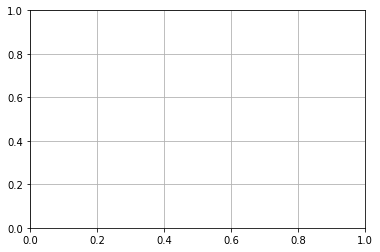

In [15]:
#AI-TECHGYM-N-22

# ライブラリのインポート
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

#データの読み込み
#http://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/train.csv
house_train = pd.read_csv("./train.csv")
#display(house_train)

#http://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/test.csv
house_test = pd.read_csv("./test.csv")
#display(house_test)

#数値型のみ抜き出す、NaNがあるところは削除する
house_train_num = house_train.select_dtypes(include='number').dropna()

#相関係数を表示
house_corr = house_train_num.corr()

#必要に応じて表示して確認
#display(house_corr)

#相関係数の上位14個を表示
display(house_corr.sort_values('SalePrice', ascending=False)['SalePrice'].head(15))

#回帰分析用のデータフレーム
df_col = ['SalePrice','OverallQual' , 'GrLivArea' , 'GarageCars' , 'GarageArea',
          'TotalBsmtSF' , '1stFlrSF' , 'FullBath' , 'TotRmsAbvGrd' , 'YearBuilt',
          'YearRemodAdd' , 'GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1']

house_train_num_df = house_train_num[df_col]

#データの準備
X = house_train_num_df.drop('SalePrice' , axis=1)
y = house_train_num_df['SalePrice'].values

# 線形回帰
slr = LinearRegression()

# fit関数でモデル作成
slr.fit(X,y)

# 回帰係数
print('回帰係数：{0}'.format(slr.coef_[0]))

# 切片(直線とy軸との交点)を出力
print('切片: {0}'.format(slr.intercept_))

#統計的データ分析と可視化
# sns.pairplot(house_train_num_df)
plt.grid(True)

df_col_test = ['OverallQual' , 'GrLivArea' , 'GarageCars' , 'GarageArea',
               'TotalBsmtSF' , '1stFlrSF' , 'FullBath' , 'TotRmsAbvGrd' , 'YearBuilt',
               'YearRemodAdd' , 'GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1']

#テストデータ、NaNがあるところは前の値で埋める
X_test = house_test[df_col_test].fillna(method = 'ffill')

# 学習済みのモデルから予測した結果をセット
y_test_pred = slr.predict(X_test)

#予測した結果を出力
display(y_test_pred)

# df_testに SalePrice カラムを追加し、学習済みのモデルから予測した結果をセット
house_test['SalePrice'] = y_test_pred

#提出するデータ形式に出力
house_test[["Id","SalePrice"]].to_csv("submission.csv",index=False)
